In [1]:
import torch, torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from loader import get_train_loader
import time

In [2]:
from networks import *

In [3]:
autoencoder_people_4 = torch.load('autoencoder.people.4.pt')
autoencoder_stickmans_4 = torch.load('autoencoder.stickmen.4.pt')
autoencoder_people_8 = torch.load('autoencoder.people.8.pt')
autoencoder_stickmans_8 = torch.load('autoencoder.stickmen.8.pt')
autoencoder_people_16 = torch.load('autoencoder.people.16.pt')
autoencoder_stickmans_16 = torch.load('autoencoder.stickmen.16.pt')

In [130]:
batch_size = 64
mask4_group_1 = np.zeros((batch_size, 3, 8, 8)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(8):
            for j in range(8):
                if i % 2 == 0 and j % 2 == 0:
                    mask4_group_1[m][n][i][j] = True

mask4_group_2 = np.zeros((batch_size, 3, 8, 8)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(8):
            for j in range(8):
                if i % 2 == 0 and j % 2 == 1:
                    mask4_group_2[m][n][i][j] = True

mask4_group_3 = np.zeros((batch_size, 3, 8, 8)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(8):
            for j in range(8):
                if i % 2 == 1 and j % 2 == 0:
                    mask4_group_3[m][n][i][j] = True

mask4_group_4 = np.zeros((batch_size, 3, 8, 8)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(8):
            for j in range(8):
                if i % 2 == 1 and j % 2 == 1:
                    mask4_group_4[m][n][i][j] = True
                    
                    

mask8_group_1 = np.zeros((batch_size, 3, 16, 16)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(16):
            for j in range(16):
                if i % 2 == 0 and j % 2 == 0:
                    mask8_group_1[m][n][i][j] = True

mask8_group_2 = np.zeros((batch_size, 3, 16, 16)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(16):
            for j in range(16):
                if i % 2 == 0 and j % 2 == 1:
                    mask8_group_2[m][n][i][j] = True

mask8_group_3 = np.zeros((batch_size, 3, 16, 16)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(16):
            for j in range(16):
                if i % 2 == 1 and j % 2 == 0:
                    mask8_group_3[m][n][i][j] = True

mask8_group_4 = np.zeros((batch_size, 3, 16, 16)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(16):
            for j in range(16):
                if i % 2 == 1 and j % 2 == 1:
                    mask8_group_4[m][n][i][j] = True

In [26]:
net4_group2 = torch.load("net4.group2.pt")
net4_group3 = torch.load("net4.group3.pt")
net4_group4 = torch.load("net4.group4.pt")

net8_group2 = torch.load("net8.group2.pt")
net8_group3 = torch.load("net8.group3.pt")
net8_group4 = torch.load("net8.group4.pt")

In [27]:
def convert_input_into_image_4(X_batch_input_initial, y_batch_output, is_plot=False):
    X_batch_input = X_batch_input_initial.clone()
    X_batch_input = X_batch_input[mask4_group_1.nonzero()].view((batch_size, 3, 4, 4))
    X_batch_input = Variable(X_batch_input).cuda()
    
    group_1 = X_batch_input.clone()
    group_2 = net4_group2(X_batch_input,
                 keypoints=autoencoder_stickmans_4(Variable(y_batch_output).cuda())[1],
                 embeddings=autoencoder_people_4(Variable(X_batch_input_initial).cuda())[1]).cpu().data
    
    X_batch_input = X_batch_input_initial.clone()
    X_batch_input = X_batch_input[(mask4_group_1 + mask4_group_2).nonzero()].view((batch_size, 3, 4, 8))
    X_batch_input = Variable(X_batch_input).cuda()
    
    group_3 = net4_group3(X_batch_input,
                 keypoints=autoencoder_stickmans_4(Variable(y_batch_output).cuda())[1],
                 embeddings=autoencoder_people_4(Variable(X_batch_input_initial).cuda())[1]).cpu().data
    
    X_batch_input = X_batch_input_initial.clone()
    X_batch_input[(mask4_group_4).nonzero()] = 0
    X_batch_input = Variable(X_batch_input).cuda()
    
    group_4 = net4_group4(X_batch_input,
                 keypoints=autoencoder_stickmans_4(Variable(y_batch_output).cuda())[1],
                 embeddings=autoencoder_people_4(Variable(X_batch_input_initial).cuda())[1]).cpu().data
    
    final_image = torch.zeros_like(X_batch_input).cpu().data.float()
    final_image[mask4_group_1.nonzero()] = group_1.view(-1).cpu().data.float()
    final_image[mask4_group_2.nonzero()] = group_2.view(-1).float()
    final_image[mask4_group_3.nonzero()] = group_3.view(-1).float()
    final_image[mask4_group_4.nonzero()] = group_4.view(-1).float()
#     if is_plot:
#         plot_gallery(X_batch[:, 1], 8, 8, 1, 3)
#         plot_gallery(final_image, 8, 8, 1, 3)
    return final_image

In [69]:
mask_first_part_8 = np.zeros((batch_size, 3, 8, 16)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(8):
            for j in range(16):
                if j % 2 == 0:
                    mask_first_part_8[m][n][i][j] = True
mask_second_part_8 = np.zeros((batch_size, 3, 8, 16)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(8):
            for j in range(16):
                if j % 2 == 1:
                    mask_second_part_8[m][n][i][j] = True

def convert_input_into_image_8(X_batch_initial_input, y_batch_initial_output):
    X_batch_input = X_batch_initial_input.clone()
    X_batch_input = X_batch_input[mask8_group_1.nonzero()].view((batch_size, 3, 8, 8))

    y_batch_output = y_batch_initial_output.clone()
    y_batch_output = y_batch_output[mask8_group_1.nonzero()].view((batch_size, 3, 8, 8))

    X_batch_input = convert_input_into_image_4(X_batch_input, y_batch_output)
    
    group_1 = X_batch_input
    
    group_2 = net8_group2(Variable(X_batch_input).cuda(),
                 keypoints=autoencoder_stickmans_8(Variable(y_batch_initial_output).cuda())[1],
                 embeddings=autoencoder_people_8(Variable(X_batch_initial_input).cuda())[1]).cpu().data
    
    X_cur_input = torch.zeros((batch_size, 3, 8, 16)).float()
    X_cur_input[mask_first_part_8.nonzero()] = group_1.view(-1).float()
    X_cur_input[mask_second_part_8.nonzero()] = group_2.view(-1).float()
    group_3 = net8_group3(Variable(X_cur_input).cuda(),
             keypoints=autoencoder_stickmans_8(Variable(y_batch_initial_output).cuda())[1],
             embeddings=autoencoder_people_8(Variable(X_batch_initial_input).cuda())[1]).cpu().data
    
    X_cur_input = torch.zeros((batch_size, 3, 16, 16)).float()
    X_cur_input[mask8_group_1.nonzero()] = group_1.view(-1).float()
    X_cur_input[mask8_group_2.nonzero()] = group_2.view(-1).float()
    X_cur_input[mask8_group_3.nonzero()] = group_3.view(-1).float()
    
    group_4 = net8_group4(Variable(X_cur_input).cuda(),
                         keypoints=autoencoder_stickmans_8(Variable(y_batch_initial_output).cuda())[1],
                         embeddings=autoencoder_people_8(Variable(X_batch_initial_input).cuda())[1]).cpu().data
    
    final_image = torch.zeros_like(y_batch_initial_output).float()
    final_image[mask8_group_1.nonzero()] = group_1.view(-1).float()
    final_image[mask8_group_2.nonzero()] = group_2.view(-1).float()
    final_image[mask8_group_3.nonzero()] = group_3.view(-1).float()
    final_image[mask8_group_4.nonzero()] = group_4.view(-1).float()
    
#     plot_gallery(X_batch[:, 0], 8, 8, 1, 3)
#     plot_gallery(X_batch[:, 1], 8, 8, 1, 3)
#     plot_gallery(final_image, 8, 8, 1, 3)
    return final_image

In [58]:
dim_x = 32
batch_size = 64
train_loader, val_loader = get_train_loader("../deepfashion/index.p", batch_size=batch_size, resize_size=dim_x)

In [83]:
class Net16Group2(nn.Module):
    """
        Network for predictions group 2 images based on group 1.
        input size: 4x4
        output size: 4x4
    """

    def __init__(self, layers=[1], bottelneck_size=32):
        super(Net16Group2, self).__init__()
        
        self.first_part = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=2, padding=0),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 64, kernel_size=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=(3, 3), padding=1),
            nn.ReLU(inplace=True)
        )

        self.up_1 = nn.Sequential(
            nn.ConvTranspose2d(96, 64, 2, stride=2)
        )

        self.conv_1 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=(2, 2), padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=(2, 2), padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=(2, 2), padding=1),
            nn.ReLU()
        )

        self.conv_2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=(2, 2), stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=(2, 2), stride=1, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 3, kernel_size=(2, 2), stride=1, padding=0),
            nn.Sigmoid()
        )

    def forward(self, x, keypoints, embeddings):
        x = self.first_part(x)
        x = torch.cat((x, keypoints, embeddings), dim=1)
        x = self.up_1(x)
        x = self.conv_1(x)
        x = self.conv_2(x)
        return x

In [84]:
mask_input_1 = np.zeros((batch_size, 3, dim_x, dim_x)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(dim_x):
            for j in range(dim_x):
                if i % 2 == 0 and j % 2 ==0:
                    mask_input_1[m][n][i][j] = True

In [85]:
mask_output_1 = np.zeros((batch_size, 3, dim_x, dim_x)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(dim_x):
            for j in range(dim_x):
                if i % 2 == 0 and j % 2 == 1:
                    mask_output_1[m][n][i][j] = True

In [86]:
criterion = torch.nn.MSELoss()
net16_group2 = Net16Group2().cuda()
optimizer = optim.Adam(net16_group2.parameters(), lr=1e-3)

In [87]:
def train_network(net, criterion, optimizer, mask_input, mask_output, shape_input, shape_output, num_epochs):
    train_loss = []
    val_loss = []
    
    for epoch in range(num_epochs):
        start_time = time.time()
        net.train(True)
        i = 0
        for X_batch, y_batch in train_loader:
            i += 1
            if X_batch.shape[0] != batch_size:
                continue
            X_batch_input = X_batch[:, 0]
            X_batch_input = X_batch_input[mask_input.nonzero()].view(shape_input)
            
            y_batch_output = y_batch[:, 1]
            y_batch_output = y_batch_output[mask_input.nonzero()].view(shape_input)
            
            X_batch_input = Variable(convert_input_into_image_8(X_batch_input, y_batch_output)).cuda()

            X_batch_output = X_batch[:, 1]
            X_batch_output = X_batch_output[mask_output.nonzero()].view(shape_output)
            X_batch_output = Variable(X_batch_output).cuda()

            output_img = net(X_batch_input,
                                     keypoints=autoencoder_stickmans_16(Variable(y_batch[:, 1]).cuda())[1],
                                     embeddings=autoencoder_people_16(Variable(X_batch[:, 0]).cuda())[1])
            loss = criterion(output_img, X_batch_output)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            train_loss.append(loss.cpu().data.numpy()[0])

        # And a full pass over the validation data:
    #     autoencoder.train(False) # disable dropout / use averages for batch_norm
    #     for X_batch, y_batch in val_loader:
    #         X_batch_0 = Variable(y_batch[:, 0]).cuda()
    #         output_img, _ = autoencoder(X_batch_0)
    #         val_loss.append(criterion(output_img, X_batch_0).cpu().data.numpy()[0])
    #         X_batch_1 = Variable(y_batch[:, 1]).cuda()
    #         output_img, _ = autoencoder(X_batch_1)
    #         val_loss.append(criterion(output_img, X_batch_1).cpu().data.numpy()[0])

        print 
        print("Epoch {} of {} took {:.3f}s".format(
            epoch + 1, num_epochs, time.time() - start_time))
        print("  training loss (in-iteration): \t{:.6f}".format(
            np.mean(train_loss[-2 * len(train_loader):])))
    #     print("  validation loss: \t\t\t{:.6f}".format(
    #         np.mean(val_loss[-2 * len(val_loader):])))

In [ ]:
train_network(net16_group2, criterion, optimizer, mask_input_1, mask_output_1,
              shape_input=(batch_size, 3, int(dim_x / 2), int(dim_x / 2)),
              shape_output=(batch_size, 3, int(dim_x / 2), int(dim_x / 2)),
              num_epochs=200
             )

Epoch 1 of 200 took 60.222s
  training loss (in-iteration): 	0.010461
Epoch 2 of 200 took 59.364s
  training loss (in-iteration): 	0.010392
Epoch 3 of 200 took 67.030s
  training loss (in-iteration): 	0.010266
Epoch 4 of 200 took 91.134s
  training loss (in-iteration): 	0.010150
Epoch 5 of 200 took 83.484s
  training loss (in-iteration): 	0.010032
Epoch 6 of 200 took 76.592s
  training loss (in-iteration): 	0.009913
Epoch 7 of 200 took 60.543s
  training loss (in-iteration): 	0.009815
Epoch 8 of 200 took 59.300s
  training loss (in-iteration): 	0.009723
Epoch 9 of 200 took 60.387s
  training loss (in-iteration): 	0.009619
Epoch 10 of 200 took 59.711s
  training loss (in-iteration): 	0.009520
Epoch 11 of 200 took 61.373s
  training loss (in-iteration): 	0.009436
Epoch 12 of 200 took 61.270s
  training loss (in-iteration): 	0.009354
Epoch 13 of 200 took 62.042s
  training loss (in-iteration): 	0.009271
Epoch 14 of 200 took 59.564s
  training loss (in-iteration): 	0.009178
Epoch 15 of 200

In [90]:
train_network(net16_group2, criterion, optimizer, mask_input_1, mask_output_1,
              shape_input=(batch_size, 3, int(dim_x / 2), int(dim_x / 2)),
              shape_output=(batch_size, 3, int(dim_x / 2), int(dim_x / 2)),
              num_epochs=1
             )

Epoch 1 of 1 took 62.069s
  training loss (in-iteration): 	0.005138


In [91]:
torch.save(net16_group2, "net16.group2.pt")

/home/koloskov/anaconda3/lib/python3.6/site-packages/torch/serialization.py:159: UserWarning: Couldn't retrieve source code for container of type Net16Group2. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [16]:
# net8_group2 = torch.load("net16.group2.pt")

In [424]:
for X_batch, y_batch in train_loader:
    break

In [330]:
X_batch_input = X_batch[:, 0]
X_batch_input = X_batch_input[mask_input_1.nonzero()].view((batch_size, 3, int(dim_x / 2), int(dim_x / 2)))
X_batch_input = Variable(X_batch_input).cuda()

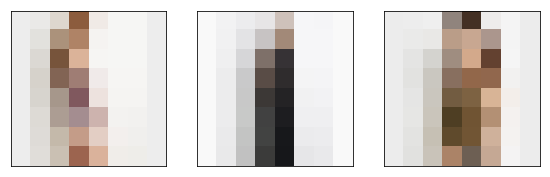

In [331]:
plot_gallery(X_batch_input.cpu().data, 8, 8, 1, 3)

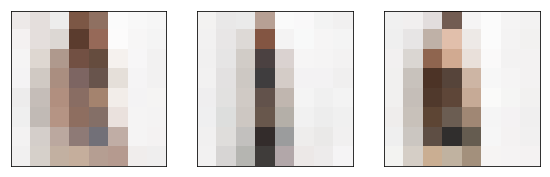

In [332]:
X_batch_input = X_batch[:, 0]
X_batch_input = X_batch_input[mask_input_1.nonzero()].view((batch_size, 3, int(dim_x / 2), int(dim_x / 2)))

y_batch_output = y_batch[:, 1]
y_batch_output = y_batch_output[mask_input_1.nonzero()].view((batch_size, 3, int(dim_x / 2), int(dim_x / 2)))

X_batch_input = Variable(convert_input_into_image_4(X_batch_input, y_batch_output)).cuda()

X_batch_output = X_batch[:, 1]
X_batch_output = X_batch_output[mask_output_1.nonzero()].view((batch_size, 3, int(dim_x / 2), int(dim_x / 2)))
X_batch_output = Variable(X_batch_output).cuda()
plot_gallery(net8_group2(X_batch_input,
                 keypoints=autoencoder_stickmans_8(Variable(y_batch[:, 1]).cuda())[1],
                 embeddings=autoencoder_people_8(Variable(X_batch[:, 0]).cuda())[1]).cpu().data,
             8, 8, 1, 3)

In [333]:
X_batch_output = X_batch[:, 1]
X_batch_output = X_batch_output[mask_output_1.nonzero()].view((batch_size, 3, int(dim_x / 2), int(dim_x / 2)))

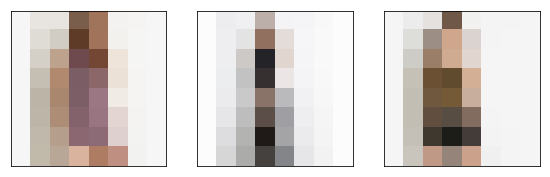

In [334]:
plot_gallery(X_batch_output, 8, 8, 1, 3)

In [121]:
class Net16Group3(nn.Module):
    """
        Network for predictions group 2 images based on group 1.
        input size: 4x4
        output size: 4x4
    """

    def __init__(self, layers=[1], bottelneck_size=32):
        super(Net16Group3, self).__init__()
        
        self.first_part = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=2, padding=0),
            nn.MaxPool2d(2),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=(1, 3), stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 64, kernel_size=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=(1, 3)),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=(3, 3), padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=(1, 3)),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=(1, 3)),
            nn.ReLU(inplace=True)
        )

        self.up_1 = nn.Sequential(
            nn.ConvTranspose2d(96, 64, 2, stride=2)
        )

        self.conv_1 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=(2, 2), padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=(2, 2), padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=(2, 2), padding=1),
            nn.ReLU()
        )

        self.conv_2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=(2, 2), stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=(2, 2), stride=1, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 3, kernel_size=(2, 2), stride=1, padding=0),
            nn.Sigmoid()
        )

    def forward(self, x, keypoints, embeddings):
        x = self.first_part(x)
#         print(x.shape)
        x = torch.cat((x, keypoints, embeddings), dim=1)
        x = self.up_1(x)
        x = self.conv_1(x)
        x = self.conv_2(x)
        return x

In [120]:
def train_network_group_3(net, criterion, optimizer, mask_input, mask_output, shape_input, shape_output, num_epochs):
    train_loss = []
    val_loss = []
    
    mask_first_part = np.zeros((batch_size, 3, int(dim_x / 2), dim_x)).astype(bool)
    for m in range(batch_size):
        for n in range(3):
            for i in range(int(dim_x/2)):
                for j in range(dim_x):
                    if j % 2 == 0:
                        mask_first_part[m][n][i][j] = True
    mask_second_part = np.zeros((batch_size, 3, int(dim_x / 2), dim_x)).astype(bool)
    for m in range(batch_size):
        for n in range(3):
            for i in range(int(dim_x/2)):
                for j in range(dim_x):
                    if j % 2 == 1:
                        mask_second_part[m][n][i][j] = True
    
    for epoch in range(num_epochs):
        start_time = time.time()
        net.train(True)
        i = 0
        for X_batch, y_batch in train_loader:
            i += 1
            if X_batch.shape[0] != batch_size:
                continue
            X_batch_input = X_batch[:, 0]
            X_batch_input = X_batch_input[mask_input.nonzero()].view(shape_output)
            
            y_batch_output = y_batch[:, 1]
            y_batch_output = y_batch_output[mask_input.nonzero()].view(shape_output)
            
            X_batch_input = Variable(convert_input_into_image_8(X_batch_input, y_batch_output)).cuda()
            X_batch_group_2 = net16_group2(X_batch_input,
                 keypoints=autoencoder_stickmans_16(Variable(y_batch[:, 1]).cuda())[1],
                 embeddings=autoencoder_people_16(Variable(X_batch[:, 0]).cuda())[1])
#             print(X_batch_input.shape)
#             print(X_batch_group_2.shape)
            X_cur_input = Variable(torch.zeros(shape_input)).cuda().float()
            X_cur_input[mask_first_part.nonzero()] = X_batch_input.view(-1).float()
            X_cur_input[mask_second_part.nonzero()] = X_batch_group_2.view(-1).float()
#             print(X_cur_input.shape)
            X_batch_output = X_batch[:, 1]
            X_batch_output = X_batch_output[mask_output.nonzero()].view(shape_output)
            X_batch_output = Variable(X_batch_output).cuda()

            output_img = net(X_cur_input,
                                     keypoints=autoencoder_stickmans_16(Variable(y_batch[:, 1]).cuda())[1],
                                     embeddings=autoencoder_people_16(Variable(X_batch[:, 0]).cuda())[1])
            loss = criterion(output_img, X_batch_output)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            train_loss.append(loss.cpu().data.numpy()[0])

        # And a full pass over the validation data:
    #     autoencoder.train(False) # disable dropout / use averages for batch_norm
    #     for X_batch, y_batch in val_loader:
    #         X_batch_0 = Variable(y_batch[:, 0]).cuda()
    #         output_img, _ = autoencoder(X_batch_0)
    #         val_loss.append(criterion(output_img, X_batch_0).cpu().data.numpy()[0])
    #         X_batch_1 = Variable(y_batch[:, 1]).cuda()
    #         output_img, _ = autoencoder(X_batch_1)
    #         val_loss.append(criterion(output_img, X_batch_1).cpu().data.numpy()[0])

        print 
        print("Epoch {} of {} took {:.3f}s".format(
            epoch + 1, num_epochs, time.time() - start_time))
        print("  training loss (in-iteration): \t{:.6f}".format(
            np.mean(train_loss[-2 * len(train_loader):])))
    #     print("  validation loss: \t\t\t{:.6f}".format(
    #         np.mean(val_loss[-2 * len(val_loader):])))

In [115]:
# mask_input_2 = np.zeros((batch_size, 3, dim_x, dim_x)).astype(bool)
# for m in range(batch_size):
#     for n in range(3):
#         for i in range(dim_x):
#             for j in range(dim_x):
#                 if i % 2 == 0:
#                     mask_input_2[m][n][i][j] = True

In [116]:
mask_output_2 = np.zeros((batch_size, 3, dim_x, dim_x)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(dim_x):
            for j in range(dim_x):
                if i % 2 == 1 and j % 2 == 0:
                    mask_output_2[m][n][i][j] = True

In [123]:
criterion = torch.nn.MSELoss()
net16_group3 = Net16Group3().cuda()
optimizer = optim.Adam(net16_group3.parameters(), lr=1e-3)

In [124]:
train_network_group_3(net16_group3, criterion, optimizer, mask_input_1, mask_output_2,
              shape_input=(batch_size, 3, int(dim_x / 2), int(dim_x)),
              shape_output=(batch_size, 3, int(dim_x / 2), int(dim_x / 2)),
              num_epochs=100
             )

Epoch 1 of 100 took 65.663s
  training loss (in-iteration): 	0.023012
Epoch 2 of 100 took 67.341s
  training loss (in-iteration): 	0.016831
Epoch 3 of 100 took 66.272s
  training loss (in-iteration): 	0.009960
Epoch 4 of 100 took 64.322s
  training loss (in-iteration): 	0.008999
Epoch 5 of 100 took 69.305s
  training loss (in-iteration): 	0.008588
Epoch 6 of 100 took 68.688s
  training loss (in-iteration): 	0.008323
Epoch 7 of 100 took 66.699s
  training loss (in-iteration): 	0.008122
Epoch 8 of 100 took 67.570s
  training loss (in-iteration): 	0.007940
Epoch 9 of 100 took 68.324s
  training loss (in-iteration): 	0.007783
Epoch 10 of 100 took 69.963s
  training loss (in-iteration): 	0.007645
Epoch 11 of 100 took 67.807s
  training loss (in-iteration): 	0.007523
Epoch 12 of 100 took 67.325s
  training loss (in-iteration): 	0.007422
Epoch 13 of 100 took 67.352s
  training loss (in-iteration): 	0.007326
Epoch 14 of 100 took 67.286s
  training loss (in-iteration): 	0.007233
Epoch 15 of 100

In [125]:
torch.save(net16_group3, "net16.group3.pt")

/home/koloskov/anaconda3/lib/python3.6/site-packages/torch/serialization.py:159: UserWarning: Couldn't retrieve source code for container of type Net16Group3. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


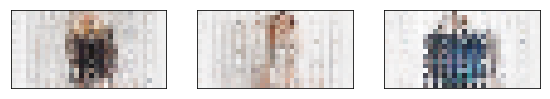

In [127]:
for X_batch, y_batch in train_loader:
    break
mask_first_part = np.zeros((batch_size, 3, int(dim_x / 2), dim_x)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(int(dim_x/2)):
            for j in range(dim_x):
                if j % 2 == 0:
                    mask_first_part[m][n][i][j] = True
mask_second_part = np.zeros((batch_size, 3, int(dim_x / 2), dim_x)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(int(dim_x/2)):
            for j in range(dim_x):
                if j % 2 == 1:
                    mask_second_part[m][n][i][j] = True

X_batch_input = X_batch[:, 0]
X_batch_input = X_batch_input[mask_input_1.nonzero()].view((batch_size, 3, int(dim_x / 2), int(dim_x / 2)))
y_batch_output = y_batch[:, 1]
y_batch_output = y_batch_output[mask_input_1.nonzero()].view((batch_size, 3, int(dim_x / 2), int(dim_x / 2)))

X_batch_input = Variable(convert_input_into_image_8(X_batch_input, y_batch_output)).cuda()
X_batch_group_2 = net8_group2(X_batch_input,
     keypoints=autoencoder_stickmans_8(Variable(y_batch[:, 1]).cuda())[1],
     embeddings=autoencoder_people_8(Variable(X_batch[:, 0]).cuda())[1])
#             print(X_batch_input.shape)
#             print(X_batch_group_2.shape)
X_cur_input = Variable(torch.zeros((batch_size, 3, int(dim_x / 2), int(dim_x)))).cuda().float()
X_cur_input[mask_first_part.nonzero()] = X_batch_input.view(-1).float()
X_cur_input[mask_second_part.nonzero()] = X_batch_group_2.view(-1).float()
plot_gallery(X_cur_input.cpu().data, 8, 8, 1, 3)

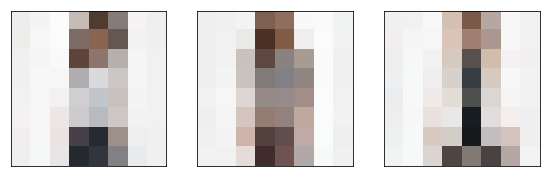

In [28]:
plot_gallery(net8_group3(X_cur_input,
                 keypoints=autoencoder_stickmans_8(Variable(y_batch[:, 1]).cuda())[1],
                 embeddings=autoencoder_people_8(Variable(X_batch[:, 0]).cuda())[1]).cpu().data,
             8, 8, 1, 3)

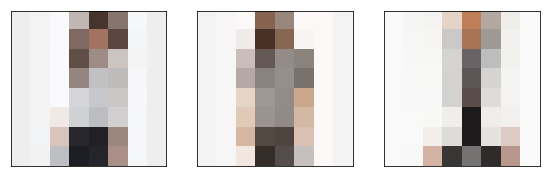

In [30]:
X_batch_output = X_batch[:, 1]
X_batch_output = X_batch_output[mask_output_2.nonzero()].view((batch_size, 3, int(dim_x / 2), int(dim_x / 2)))
plot_gallery(X_batch_output, 8, 8, 1, 3)

In [129]:
mask16_group_1 = np.zeros((batch_size, 3, dim_x, dim_x)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(dim_x):
            for j in range(dim_x):
                if i % 2 == 0 and j % 2 == 0:
                    mask16_group_1[m][n][i][j] = True
mask16_group_2 = np.zeros((batch_size, 3, dim_x, dim_x)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(dim_x):
            for j in range(dim_x):
                if i % 2 == 0 and j % 2 == 1:
                    mask16_group_2[m][n][i][j] = True

mask16_group_3 = np.zeros((batch_size, 3, dim_x, dim_x)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(dim_x):
            for j in range(dim_x):
                if i % 2 == 1 and j % 2 == 0:
                    mask16_group_3[m][n][i][j] = True

In [131]:
def train_group4_network(net, criterion, optimizer, mask_input, mask_output, shape_output, num_epochs):
    train_loss = []
    val_loss = []
    
    mask_first_part = np.zeros((batch_size, 3, int(dim_x / 2), dim_x)).astype(bool)
    for m in range(batch_size):
        for n in range(3):
            for i in range(int(dim_x/2)):
                for j in range(dim_x):
                    if j % 2 == 0:
                        mask_first_part[m][n][i][j] = True
    mask_second_part = np.zeros((batch_size, 3, int(dim_x / 2), dim_x)).astype(bool)
    for m in range(batch_size):
        for n in range(3):
            for i in range(int(dim_x/2)):
                for j in range(dim_x):
                    if j % 2 == 1:
                        mask_second_part[m][n][i][j] = True
    
    for epoch in range(num_epochs):
        start_time = time.time()
        net.train(True)
        i = 0
        for X_batch, y_batch in train_loader:
            i += 1
            if X_batch.shape[0] != batch_size:
                continue
#             X_batch_input = X_batch[:, 0]
#             X_batch_input[(~mask_input).nonzero()] = 0
#             X_batch_input = Variable(X_batch_input).cuda()

#             X_batch_output = X_batch[:, 1]
#             X_batch_output = X_batch_output[mask_output.nonzero()].view(shape_output)
#             X_batch_output = Variable(X_batch_output).cuda()

            X_batch_input = X_batch[:, 0]
            X_batch_input = X_batch_input[mask_input.nonzero()].view(shape_output)
            
            y_batch_output = y_batch[:, 1]
            y_batch_output = y_batch_output[mask_input.nonzero()].view(shape_output)
            
            X_batch_input = Variable(convert_input_into_image_8(X_batch_input, y_batch_output)).cuda()
            X_batch_group_2 = net16_group2(X_batch_input,
                 keypoints=autoencoder_stickmans_16(Variable(y_batch[:, 1]).cuda())[1],
                 embeddings=autoencoder_people_16(Variable(X_batch[:, 0]).cuda())[1])
#             print(X_batch_input.shape)
            X_cur_input = Variable(torch.zeros((batch_size, 3, int(dim_x / 2), dim_x))).cuda().float()
            X_cur_input[mask_first_part.nonzero()] = X_batch_input.view(-1).float()
            X_cur_input[mask_second_part.nonzero()] = X_batch_group_2.view(-1).float()
            X_batch_group_3 = net16_group3(X_cur_input,
                 keypoints=autoencoder_stickmans_16(Variable(y_batch[:, 1]).cuda())[1],
                 embeddings=autoencoder_people_16(Variable(X_batch[:, 0]).cuda())[1])
#             print(X_cur_input.shape)

            X_cur_input = Variable(torch.zeros((batch_size, 3, dim_x, dim_x))).cuda().float()
            X_cur_input[mask16_group_1.nonzero()] = X_batch_input.view(-1).float()
            X_cur_input[mask16_group_2.nonzero()] = X_batch_group_2.view(-1).float()
            X_cur_input[mask16_group_3.nonzero()] = X_batch_group_3.view(-1).float()
    
            X_batch_output = X_batch[:, 1]
            X_batch_output = X_batch_output[mask_output.nonzero()].view(shape_output)
            X_batch_output = Variable(X_batch_output).cuda()

            output_img = net(X_cur_input,
                             keypoints=autoencoder_stickmans_16(Variable(y_batch[:, 1]).cuda())[1],
                             embeddings=autoencoder_people_16(Variable(X_batch[:, 0]).cuda())[1])
            loss = criterion(output_img, X_batch_output)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            train_loss.append(loss.cpu().data.numpy()[0])

        # And a full pass over the validation data:
    #     autoencoder.train(False) # disable dropout / use averages for batch_norm
    #     for X_batch, y_batch in val_loader:
    #         X_batch_0 = Variable(y_batch[:, 0]).cuda()
    #         output_img, _ = autoencoder(X_batch_0)
    #         val_loss.append(criterion(output_img, X_batch_0).cpu().data.numpy()[0])
    #         X_batch_1 = Variable(y_batch[:, 1]).cuda()
    #         output_img, _ = autoencoder(X_batch_1)
    #         val_loss.append(criterion(output_img, X_batch_1).cpu().data.numpy()[0])

        print 
        print("Epoch {} of {} took {:.3f}s".format(
            epoch + 1, num_epochs, time.time() - start_time))
        print("  training loss (in-iteration): \t{:.6f}".format(
            np.mean(train_loss[-2 * len(train_loader):])))
    #     print("  validation loss: \t\t\t{:.6f}".format(
    #         np.mean(val_loss[-2 * len(val_loader):])))

In [172]:
class Net16Group4(nn.Module):
    """
        Network for predictions group 2 images based on group 1.
        input size: 4x4
        output size: 4x4
    """

    def __init__(self, layers=[1], bottelneck_size=32):
        super(Net16Group4, self).__init__()
        
        self.first_part = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=2, padding=0),
            nn.MaxPool2d(2),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=(3, 3), stride=1, ),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 64, kernel_size=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=(2, 2)),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=(2, 2), stride=1),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, kernel_size=(2, 2)),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=(2, 2)),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
        )

        self.up_1 = nn.Sequential(
            nn.ConvTranspose2d(96, 64, 2, stride=2)
        )

        self.conv_1 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=(2, 2), padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=(2, 2), padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=(2, 2), padding=1),
            nn.ReLU()
        )

        self.conv_2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=(2, 2), stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=(2, 2), stride=1, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 3, kernel_size=(2, 2), stride=1, padding=0),
            nn.Sigmoid()
        )

    def forward(self, x, keypoints, embeddings):
        x = self.first_part(x)
        x = torch.cat((x, keypoints, embeddings), dim=1)
        x = self.up_1(x)
        x = self.conv_1(x)
        x = self.conv_2(x)
        return x

In [62]:
# mask_input_3 = np.zeros((batch_size, 3, dim_x, dim_x)).astype(bool)
# for m in range(batch_size):
#     for n in range(3):
#         for i in range(dim_x):
#             for j in range(dim_x):
#                 if i % 2 == 0 or j % 2 == 0:
#                     mask_input_3[m][n][i][j] = True

In [173]:
mask_output_3 = np.zeros((batch_size, 3, dim_x, dim_x)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(dim_x):
            for j in range(dim_x):
                if i % 2 == 1 and j % 2 == 1:
                    mask_output_3[m][n][i][j] = True

In [174]:
criterion = torch.nn.MSELoss()
net16_group4 = Net16Group4().cuda()
optimizer = optim.Adam(net16_group4.parameters(), lr=1e-3)

In [ ]:
train_group4_network(net16_group4, criterion, optimizer, mask_input_1, mask_output_3,
#                      shape_input=(batch_size, 3, dim_x, dim_x),
              shape_output=(batch_size, 3, int(dim_x / 2), int(dim_x / 2)),
              num_epochs=100
             )

Epoch 1 of 100 took 78.283s
  training loss (in-iteration): 	0.023855
Epoch 2 of 100 took 79.508s
  training loss (in-iteration): 	0.017079
Epoch 3 of 100 took 79.943s
  training loss (in-iteration): 	0.009701
Epoch 4 of 100 took 82.998s
  training loss (in-iteration): 	0.008757
Epoch 5 of 100 took 77.082s
  training loss (in-iteration): 	0.008219
Epoch 6 of 100 took 78.603s
  training loss (in-iteration): 	0.007857
Epoch 7 of 100 took 79.255s
  training loss (in-iteration): 	0.007567


In [178]:
train_group4_network(net16_group4, criterion, optimizer, mask_input_1, mask_output_3,
#                      shape_input=(batch_size, 3, dim_x, dim_x),
              shape_output=(batch_size, 3, int(dim_x / 2), int(dim_x / 2)),
              num_epochs=1
             )

Epoch 1 of 1 took 79.137s
  training loss (in-iteration): 	0.004873


In [ ]:
print("hi")

In [177]:
torch.save(net16_group4, "net16.group4.pt")

/home/koloskov/anaconda3/lib/python3.6/site-packages/torch/serialization.py:159: UserWarning: Couldn't retrieve source code for container of type Net16Group4. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [176]:
print("hi")

hi


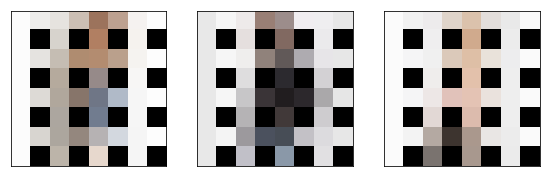

In [347]:
X_batch_input = X_batch[:, 0].clone()
X_batch_input[(~mask_input_3).nonzero()] = 0
X_batch_input = Variable(X_batch_input).cuda()
plot_gallery(X_batch_input.cpu().data, 8, 8, 1, 3)

In [93]:
mask_group_1 = np.zeros((batch_size, 3, dim_x, dim_x)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(dim_x):
            for j in range(dim_x):
                if i % 2 == 0 and j % 2 == 0:
                    mask_group_1[m][n][i][j] = True

mask_group_2 = np.zeros((batch_size, 3, dim_x, dim_x)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(dim_x):
            for j in range(dim_x):
                if i % 2 == 0 and j % 2 == 1:
                    mask_group_2[m][n][i][j] = True

mask_group_3 = np.zeros((batch_size, 3, dim_x, dim_x)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(dim_x):
            for j in range(dim_x):
                if i % 2 == 1 and j % 2 == 0:
                    mask_group_3[m][n][i][j] = True

mask_group_4 = np.zeros((batch_size, 3, dim_x, dim_x)).astype(bool)
for m in range(batch_size):
    for n in range(3):
        for i in range(dim_x):
            for j in range(dim_x):
                if i % 2 == 1 and j % 2 == 1:
                    mask_group_4[m][n][i][j] = True

In [199]:
def convert_input_into_image_16(X_batch):
    X_batch_input = X_batch[:, 0].clone()
    X_batch_input = X_batch_input[mask_input_1.nonzero()].view((batch_size, 3, int(dim_x / 2), int(dim_x / 2)))

    y_batch_output = y_batch[:, 1].clone()
    y_batch_output = y_batch_output[mask_input_1.nonzero()].view((batch_size, 3, int(dim_x / 2), int(dim_x / 2)))

    X_batch_input = Variable(convert_input_into_image_8(X_batch_input, y_batch_output)).cuda()
    
    group_1 = X_batch_input.cpu().data
    
    group_2 = net16_group2(X_batch_input,
                 keypoints=autoencoder_stickmans_16(Variable(y_batch[:, 1]).cuda())[1],
                 embeddings=autoencoder_people_16(Variable(X_batch[:, 0]).cuda())[1]).cpu().data
    
    X_cur_input = torch.zeros((batch_size, 3, int(dim_x / 2), dim_x)).float()
    X_cur_input[mask_first_part.nonzero()] = group_1.view(-1).float()
    X_cur_input[mask_second_part.nonzero()] = group_2.view(-1).float()
    group_3 = net16_group3(Variable(X_cur_input).cuda(),
             keypoints=autoencoder_stickmans_16(Variable(y_batch[:, 1]).cuda())[1],
             embeddings=autoencoder_people_16(Variable(X_batch[:, 0]).cuda())[1]).cpu().data
    
    X_cur_input = torch.zeros((batch_size, 3, dim_x, dim_x)).float()
    X_cur_input[mask16_group_1.nonzero()] = group_1.view(-1).float()
    X_cur_input[mask16_group_2.nonzero()] = group_2.view(-1).float()
    X_cur_input[mask16_group_3.nonzero()] = group_3.view(-1).float()
    
    group_4 = net16_group4(Variable(X_cur_input).cuda(),
                         keypoints=autoencoder_stickmans_16(Variable(y_batch[:, 1]).cuda())[1],
                         embeddings=autoencoder_people_16(Variable(X_batch[:, 0]).cuda())[1]).cpu().data
    
    final_image = torch.zeros_like(X_batch[:, 1]).float()
    final_image[mask16_group_1.nonzero()] = group_1.view(-1).float()
    final_image[mask_output_1.nonzero()] = group_2.view(-1).float()
    final_image[mask_output_2.nonzero()] = group_3.view(-1).float()
    final_image[mask_output_3.nonzero()] = group_4.view(-1).float()
    
    plot_gallery(X_batch[:, 0], 8, 8, 1, 1)
    plot_gallery(X_batch[:, 1], 8, 8, 1, 1)
    plot_gallery(final_image, 8, 8, 1, 1)

In [221]:
for i, (X_batch, y_batch) in enumerate(val_loader):
    if i == 18:
        break

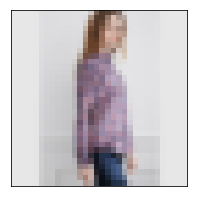

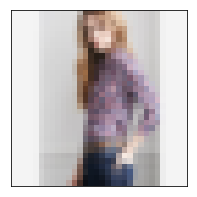

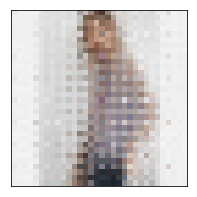

In [222]:
convert_input_into_image_16(X_batch)

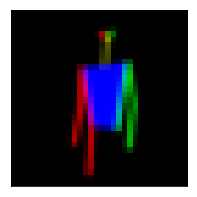

In [212]:
plot_gallery(y_batch[:, 1], 8, 8, 1, 1)

In [209]:
for i, (X_batch, y_batch) in enumerate(train_loader):
    if i == 15:
        break

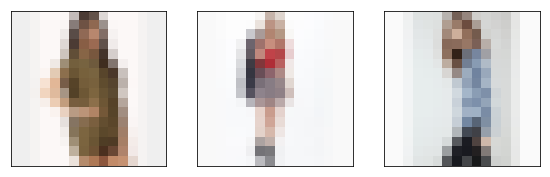

In [123]:
plot_gallery(X_batch[:, 0], 8, 8, 1, 3)

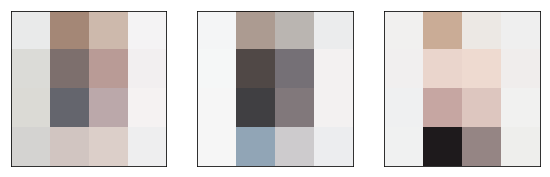

In [349]:
plot_gallery(net4_group4(X_batch_input,
                 keypoints=autoencoder_stickmans(Variable(y_batch[:, 1]).cuda())[1],
                 embeddings=autoencoder_people(Variable(X_batch[:, 0]).cuda())[1]).cpu().data,
             8, 8, 1, 3)

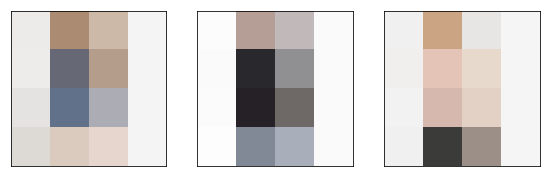

In [350]:
X_batch_output = X_batch[:, 1]
X_batch_output = X_batch_output[mask_output.nonzero()].view((batch_size, 3, int(dim_x / 2), int(dim_x / 2)))
plot_gallery(X_batch_output, 8, 8, 1, 3)

# Video

In [187]:
initial_dance = np.array([ [138.,  27.],
                           [133.,  53.],
                           [114.,  50.],
                           [108.,  90.],
                           [114., 121.],
                           [152.,  57.],
                           [152.,  95.],
                           [165., 126.],
                           [118., 118.],
                           [121., 172.],
                           [144., 226.],
                           [141., 118.],
                           [140., 172.],
                           [135., 225.],
                           [135.,  21.],
                           [144.,  23.],
                           [129.,  22.],
                           [150.,  27.] ]
                        )

def generate_circle_trajectory(radius, center, start_y, end_y):
    y = np.arange(int(np.min([start_y, end_y])), int(np.max([start_y, end_y])) + 1)
    
    x = np.round(center[0] + np.sqrt(radius ** 2 - (y - center[1]) ** 2)).astype(np.int32)
    return x

dancing_poses = []

for i in range(len(x)):
    dummy = np.copy(initial_dance)
    dummy[7] = dummy[6] - np.array([-x[i], y[i]])
    dummy[4] = dummy[3] - np.array([x[i], y[i]])
    #plt.imshow(dataset.make_joint_img((256, 256, 3), dataset.jo, dummy))
    #plt.show()
    dancing_poses.append(dummy)

for i in range(len(x)):
    dummy = np.copy(initial_dance)
    dummy[7] = dummy[6] + np.array([x[i], y[i]])
    dummy[4] = dummy[3] + np.array([-x[i], y[i]])
    #plt.imshow(dataset.make_joint_img((256, 256, 3), dataset.jo, dummy))
    #plt.show()
    dancing_poses.append(dummy)
    
np.save('dancing_poses.npy', np.array(dancing_poses))

NameError: name 'x' is not defined